# Sales price study Notebook

## Objectives.

- Load and inspect the data prepared during data collection (01_data_collection).
- Data Exploration.
- EDA on selected variables.
- Conclusion and next steps.

## Inputs:

- inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv

Additional Comments: 

- This notebook has been written with the help from my colleagues, the walkthrough project and the data cleaning lesson provided within the course.
- This notebook is designed to allow us to explore the data using the CRISP-DM data understanding methodology. 

___


## Changing the working directory:

Change the working directory from its current folder to its parent folder: 

- Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Project-5-Predictive-Analytics/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
 
    - os.path.dirname() gets the parent directory.
    - os.chir() defines the new current directory. 

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory, congrats!")

You set a new current directory, congrats!


The following command will confirm the new current directory: 

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Project-5-Predictive-Analytics'

___

## Load Data:

In [4]:
import pandas as pd
df = (pd.read_csv("inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv"))
df

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694.0,3.0,No,0,Unf,953,NaN,460,RFn,...,62.0,0.0,40,5,6,953,0.0,1999,2000,175000
1456,2073,0.0,NaN,No,790,ALQ,589,NaN,500,Unf,...,85.0,119.0,0,6,6,1542,NaN,1978,1988,210000
1457,1188,1152.0,4.0,No,275,GLQ,877,NaN,252,RFn,...,66.0,0.0,60,9,7,1152,NaN,1941,2006,266500
1458,1078,0.0,2.0,Mn,49,NaN,0,112.0,240,Unf,...,68.0,0.0,0,6,5,1078,NaN,1950,1996,142125


___


## Correlation Study

Asses correlation levels across numerical variables using 'Spearman' and 'Pearson' methods.

- We will exclude the first item returned as this will be the correlation between SalePrice (Pearson) and SalePrice (Spearman).
- The ideal is to be able to fetch only the most relevant correlations. (We will correlate 10)

### Pearson Method:

- Using the 'Pearson' method to measure the linear relationship between two features.

In [5]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

/tmp/ipykernel_1507/819116545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)


OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

## Spearman Method:

- Using the 'Spearman' method to measure the linear relationship between two features.

In [6]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

/tmp/ipykernel_1507/1835576946.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)


OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64

After conducting the correlation study with the 2 methods (Pearson & Spearman) we got to the conclusion that there are positively strong levels of correlation. (This level of correlation is between Sales Price and at least 5 variables)

### Investigation:

- We will take the top 5 variables returned for each method, and transform them into a list by concatenate the two lists.
- After this we will be able to visualize a unique correlation from both methods combined. 

In [7]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

- This results 6 variables (1stFlrSF, GarageArea, GrLivArea, OverallQual, TotalBsmtSF, YearBuilt) that correlate to Sale Price.
- These 6 variables will be tested on strength to predicting the Sale Price.

In [8]:
corr_var_list = list(set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list()))
corr_var_list

['TotalBsmtSF',
 '1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'YearBuilt']

___

## EDA on the correlated variable list.

- Filter the house price dataset on only the correlated variable list and include the sale price.

In [9]:
df_eda = df.filter(corr_var_list + ['SalePrice'])
print(df_eda.shape)
df_eda.head(7)

(1460, 7)


,TotalBsmtSF,1stFlrSF,GarageArea,GrLivArea,OverallQual,YearBuilt,SalePrice
0,856,856,548,1710,7,2003,208500
1,1262,1262,460,1262,6,1976,181500
2,920,920,608,1786,7,2001,223500
3,756,961,642,1717,7,1915,140000
4,1145,1145,836,2198,8,2000,250000
5,796,796,480,1362,5,1993,143000
6,1686,1694,636,1694,8,2004,307000


### Visualize variable correlation to Sale Price:

- Plot the distribution: 



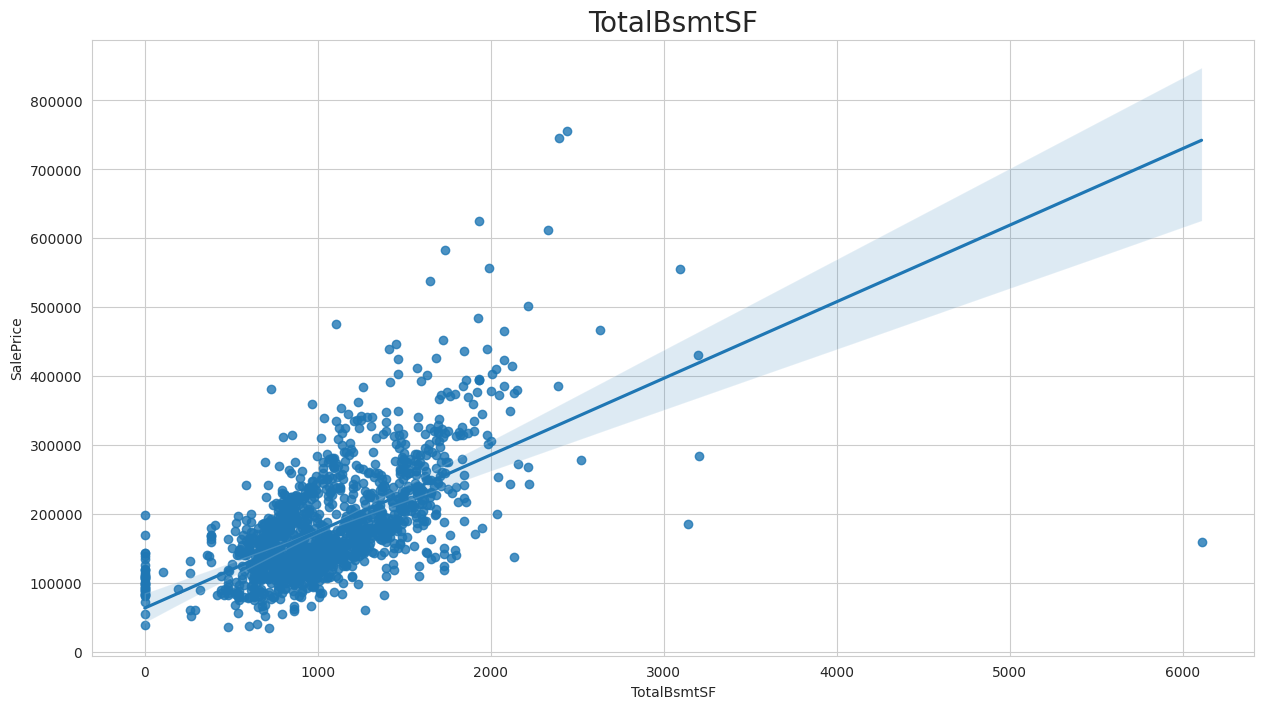

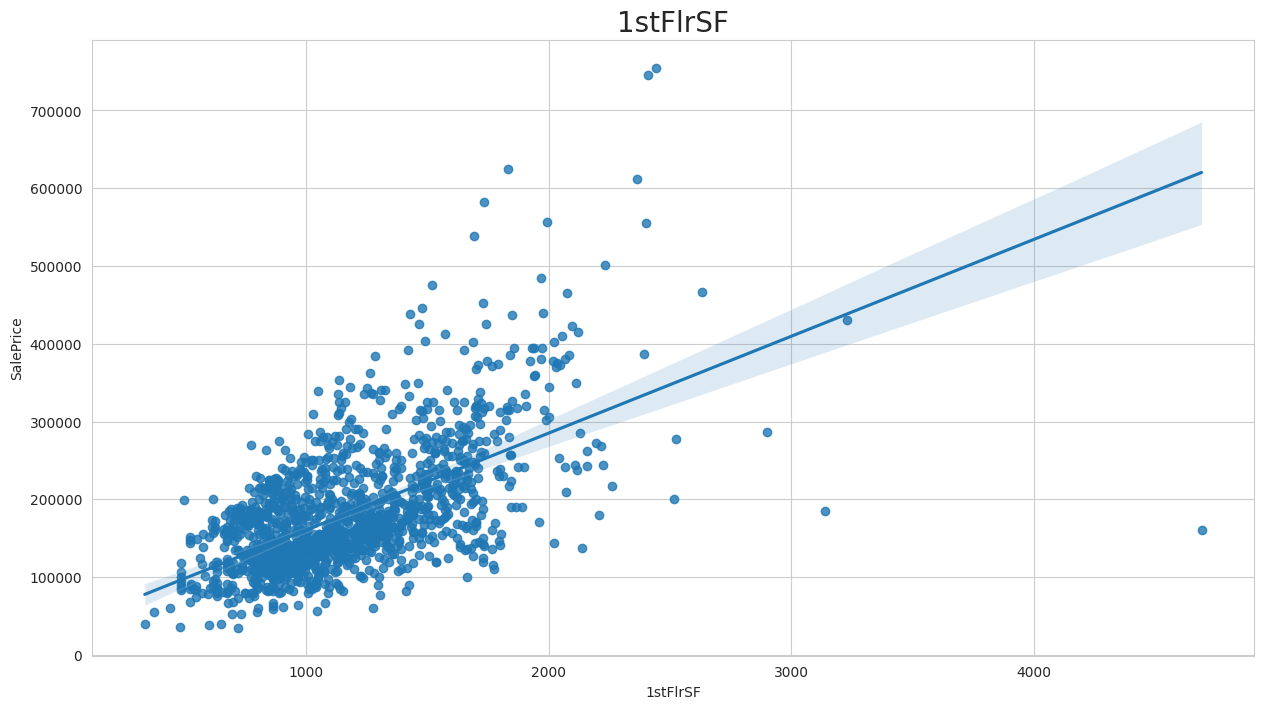

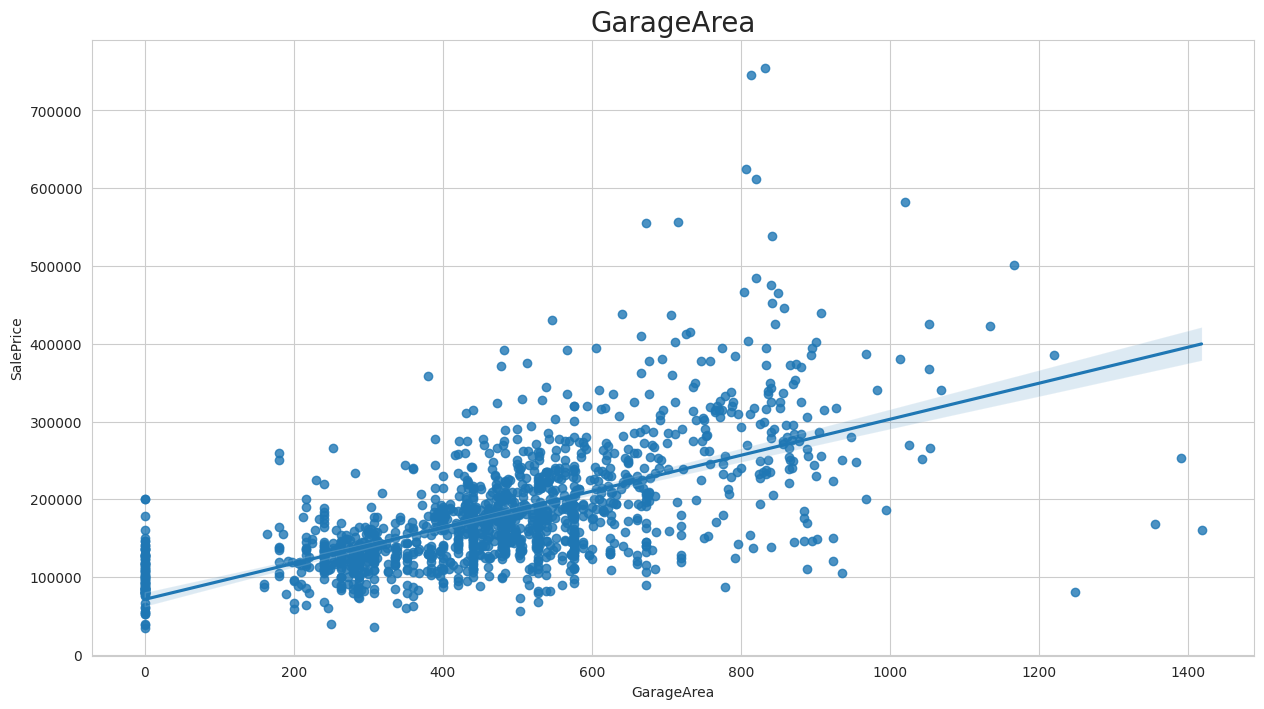

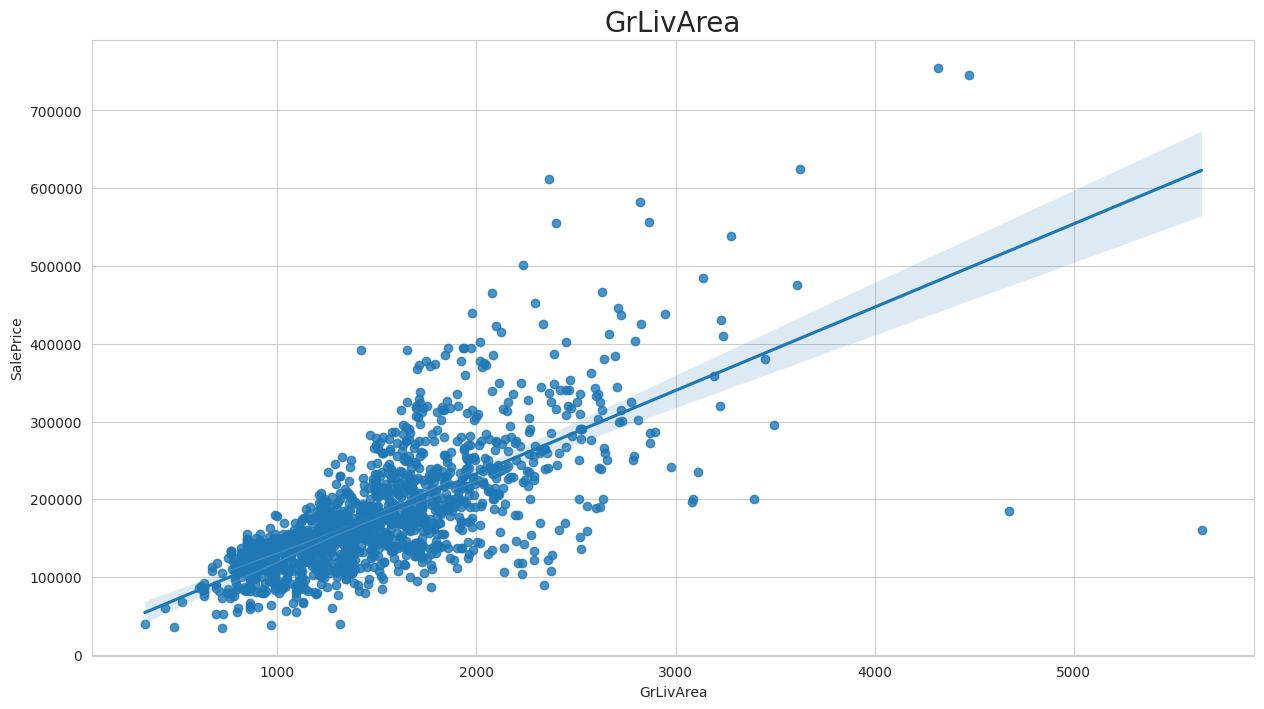

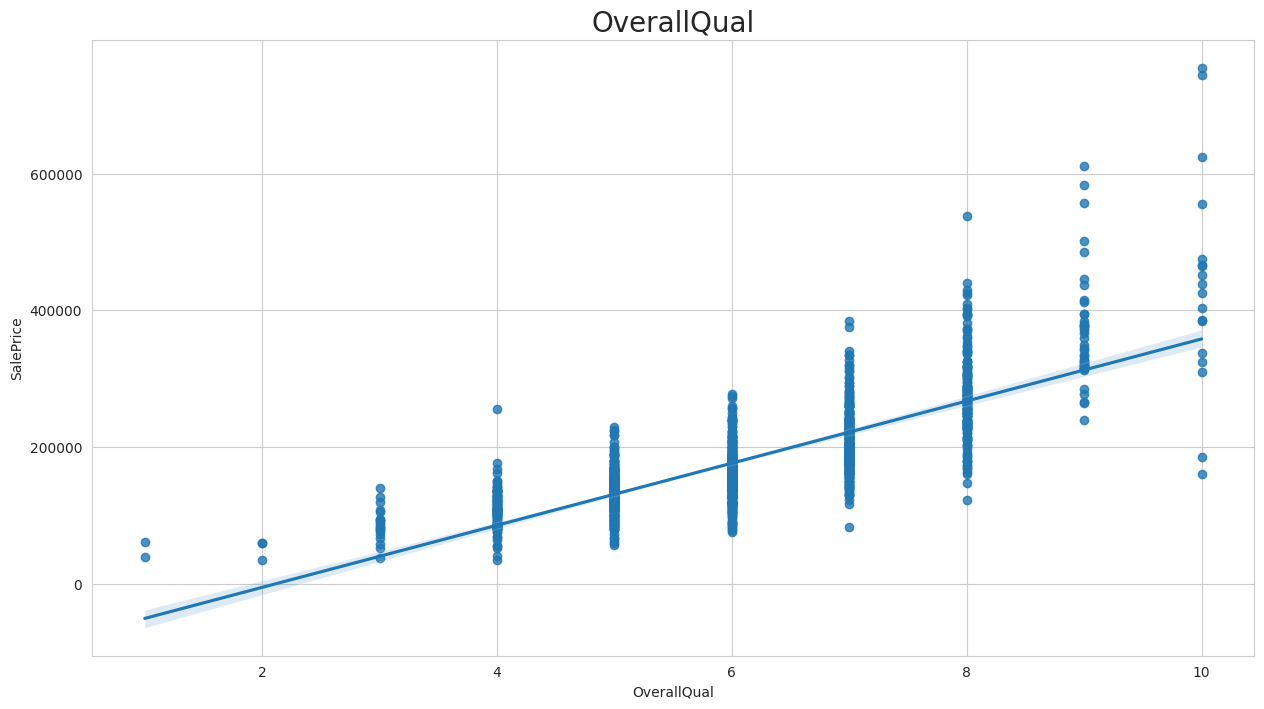

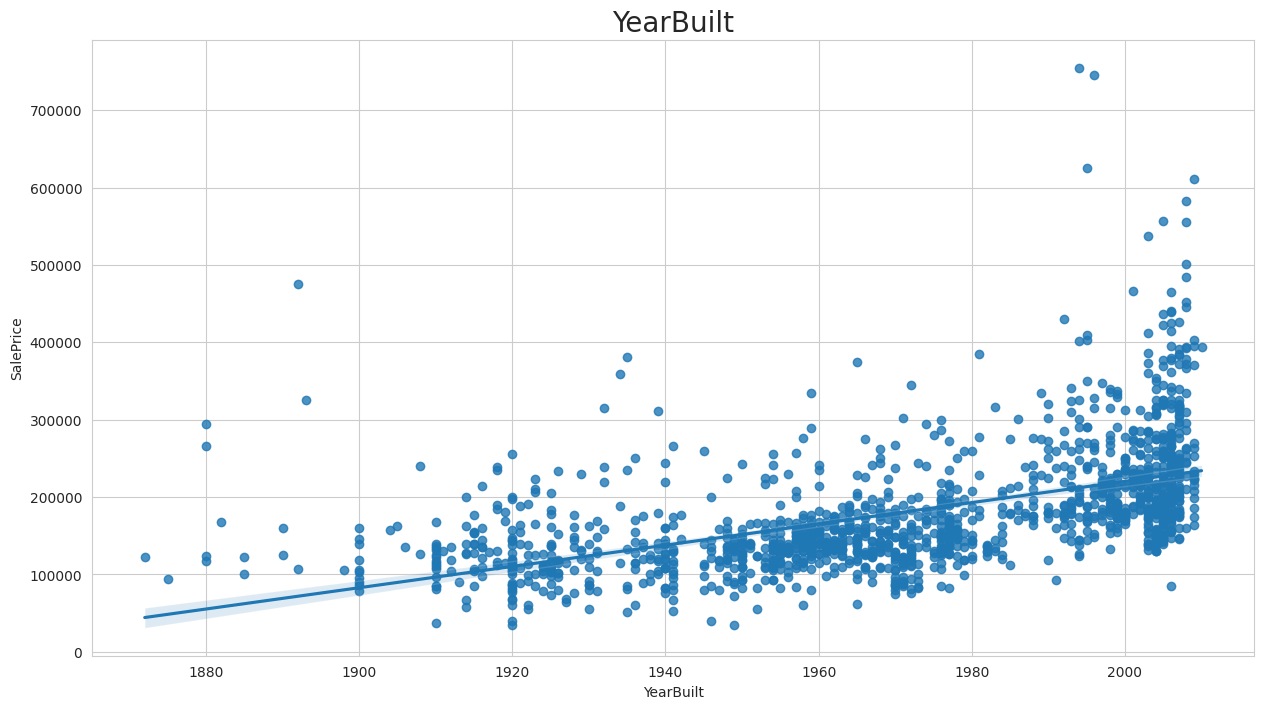

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

def plot_numerical(df, col, target_var):
  plt.figure(figsize=(15, 8))
  sns.regplot(data=df, x=col, y=target_var)  
  plt.title(f"{col}", fontsize=20)
  plt.show()


target_var = 'SalePrice'
for col in corr_var_list:
  plot_numerical(df_eda, col, target_var)
  print("\n\n")

## Data Exploration:

In [11]:
import pandas as pd
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe() 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

___

## Conclusion and the next steps:

**The correlations and plots interpretation converge.**

The variables analyzed in the correlation study are as follows:

- 1stFlrSF: Area in square feet of the first floor.
- GarageArea: Area in square feet of the garage.
- GrLivArea: Area in square feet of the above grade living area.
- OverallQual: Rating of the overall material and finish of the house at the time of construction or refurbishment.
- YearBuilt: Original construction date of the house (ranging from 1972 to 2010).
- TotalBsmtSF: Total area in square feet of the basement.

Based on the aforementioned analyses, we conclude that the following factors play a significant role in determining house prices:

- Living area on the ground floor.
- Basement area.
- Garage area.
- Additionally, the year of construction and the quality of materials used during construction or refurbishment are important factors in house pricing.

The plots indicate a strong correlation among the variables examined in the correlation study, suggesting a potentially strong predictive power for the Sale Price of these houses.

Our next task involves cleaning the data.




___